## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  32.319721  1513.195192  0.382183  5.684207  1.489198
1  26.437841   970.800494  0.831486  1.113215  1.504672
2  86.712226  1634.922019  0.754547  4.888817  1.507861
3  92.560446  1731.623276  0.048754  5.236523  0.754545
4  93.185024  1013.893893  0.495443  8.696231  1.313510


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0826710	total: 67.8ms	remaining: 1m 7s
1:	learn: 1.0753295	total: 68.4ms	remaining: 34.1s
2:	learn: 1.0676511	total: 69.1ms	remaining: 22.9s
3:	learn: 1.0581746	total: 69.7ms	remaining: 17.3s
4:	learn: 1.0516524	total: 70.3ms	remaining: 14s
5:	learn: 1.0422584	total: 70.9ms	remaining: 11.7s
6:	learn: 1.0338468	total: 71.4ms	remaining: 10.1s
7:	learn: 1.0244858	total: 72ms	remaining: 8.92s
8:	learn: 1.0148661	total: 72.5ms	remaining: 7.99s
9:	learn: 1.0068132	total: 72.9ms	remaining: 7.22s
10:	learn: 0.9976257	total: 73.4ms	remaining: 6.6s
11:	learn: 0.9889859	total: 73.8ms	remaining: 6.07s
12:	learn: 0.9792769	total: 74.2ms	remaining: 5.63s
13:	learn: 0.9703779	total: 74.8ms	remaining: 5.27s
14:	learn: 0.9617435	total: 75.3ms	remaining: 4.94s
15:	learn: 0.9538728	total: 75.9ms	remaining: 4.67s
16:	learn: 0.9454162	total: 76.3ms	remaining: 4.41s
17:	learn: 0.9354521	total: 76.8ms	remaining: 4.19s
18:	learn: 0.9282157	total: 77.3ms	remaining: 3.9

88:	learn: 0.5459953	total: 108ms	remaining: 1.11s
89:	learn: 0.5424582	total: 109ms	remaining: 1.1s
90:	learn: 0.5390532	total: 109ms	remaining: 1.09s
91:	learn: 0.5353550	total: 110ms	remaining: 1.08s
92:	learn: 0.5318761	total: 110ms	remaining: 1.07s
93:	learn: 0.5282913	total: 110ms	remaining: 1.06s
94:	learn: 0.5250090	total: 111ms	remaining: 1.05s
95:	learn: 0.5215041	total: 111ms	remaining: 1.05s
96:	learn: 0.5186444	total: 112ms	remaining: 1.04s
97:	learn: 0.5152781	total: 112ms	remaining: 1.03s
98:	learn: 0.5125181	total: 112ms	remaining: 1.02s
99:	learn: 0.5093342	total: 113ms	remaining: 1.01s
100:	learn: 0.5061790	total: 113ms	remaining: 1.01s
101:	learn: 0.5026221	total: 114ms	remaining: 1s
102:	learn: 0.4996645	total: 114ms	remaining: 993ms
103:	learn: 0.4971306	total: 115ms	remaining: 986ms
104:	learn: 0.4937120	total: 115ms	remaining: 981ms
105:	learn: 0.4899602	total: 116ms	remaining: 975ms
106:	learn: 0.4867612	total: 116ms	remaining: 970ms
107:	learn: 0.4837481	total:

266:	learn: 0.2184430	total: 187ms	remaining: 513ms
267:	learn: 0.2179688	total: 187ms	remaining: 511ms
268:	learn: 0.2175177	total: 188ms	remaining: 510ms
269:	learn: 0.2162430	total: 188ms	remaining: 508ms
270:	learn: 0.2148354	total: 188ms	remaining: 507ms
271:	learn: 0.2139042	total: 189ms	remaining: 505ms
272:	learn: 0.2135365	total: 189ms	remaining: 504ms
273:	learn: 0.2129693	total: 190ms	remaining: 502ms
274:	learn: 0.2120250	total: 190ms	remaining: 501ms
275:	learn: 0.2111574	total: 190ms	remaining: 499ms
276:	learn: 0.2101200	total: 191ms	remaining: 498ms
277:	learn: 0.2093489	total: 191ms	remaining: 496ms
278:	learn: 0.2087691	total: 192ms	remaining: 495ms
279:	learn: 0.2081720	total: 192ms	remaining: 494ms
280:	learn: 0.2073110	total: 192ms	remaining: 492ms
281:	learn: 0.2068953	total: 193ms	remaining: 491ms
282:	learn: 0.2057142	total: 193ms	remaining: 489ms
283:	learn: 0.2048821	total: 194ms	remaining: 488ms
284:	learn: 0.2041744	total: 194ms	remaining: 486ms
285:	learn: 

503:	learn: 0.0907686	total: 290ms	remaining: 285ms
504:	learn: 0.0906839	total: 290ms	remaining: 285ms
505:	learn: 0.0906004	total: 291ms	remaining: 284ms
506:	learn: 0.0905182	total: 291ms	remaining: 283ms
507:	learn: 0.0900868	total: 292ms	remaining: 282ms
508:	learn: 0.0900060	total: 292ms	remaining: 282ms
509:	learn: 0.0899265	total: 292ms	remaining: 281ms
510:	learn: 0.0898482	total: 292ms	remaining: 280ms
511:	learn: 0.0897750	total: 293ms	remaining: 279ms
512:	learn: 0.0896848	total: 293ms	remaining: 278ms
513:	learn: 0.0895962	total: 294ms	remaining: 278ms
514:	learn: 0.0895206	total: 294ms	remaining: 277ms
515:	learn: 0.0894340	total: 294ms	remaining: 276ms
516:	learn: 0.0893489	total: 295ms	remaining: 275ms
517:	learn: 0.0892744	total: 295ms	remaining: 275ms
518:	learn: 0.0891910	total: 295ms	remaining: 274ms
519:	learn: 0.0891092	total: 296ms	remaining: 273ms
520:	learn: 0.0887039	total: 296ms	remaining: 272ms
521:	learn: 0.0886320	total: 297ms	remaining: 272ms
522:	learn: 

687:	learn: 0.0572775	total: 368ms	remaining: 167ms
688:	learn: 0.0570643	total: 369ms	remaining: 166ms
689:	learn: 0.0569986	total: 369ms	remaining: 166ms
690:	learn: 0.0569337	total: 369ms	remaining: 165ms
691:	learn: 0.0566722	total: 370ms	remaining: 165ms
692:	learn: 0.0565362	total: 370ms	remaining: 164ms
693:	learn: 0.0563126	total: 371ms	remaining: 163ms
694:	learn: 0.0561583	total: 371ms	remaining: 163ms
695:	learn: 0.0560253	total: 371ms	remaining: 162ms
696:	learn: 0.0558628	total: 372ms	remaining: 162ms
697:	learn: 0.0556099	total: 372ms	remaining: 161ms
698:	learn: 0.0554510	total: 373ms	remaining: 161ms
699:	learn: 0.0552056	total: 373ms	remaining: 160ms
700:	learn: 0.0550436	total: 374ms	remaining: 159ms
701:	learn: 0.0548303	total: 374ms	remaining: 159ms
702:	learn: 0.0547030	total: 375ms	remaining: 158ms
703:	learn: 0.0545525	total: 375ms	remaining: 158ms
704:	learn: 0.0544995	total: 376ms	remaining: 157ms
705:	learn: 0.0543695	total: 376ms	remaining: 157ms
706:	learn: 

918:	learn: 0.0297332	total: 471ms	remaining: 41.5ms
919:	learn: 0.0296768	total: 472ms	remaining: 41ms
920:	learn: 0.0295906	total: 472ms	remaining: 40.5ms
921:	learn: 0.0295356	total: 472ms	remaining: 40ms
922:	learn: 0.0294512	total: 473ms	remaining: 39.5ms
923:	learn: 0.0293107	total: 473ms	remaining: 38.9ms
924:	learn: 0.0292290	total: 474ms	remaining: 38.4ms
925:	learn: 0.0291755	total: 474ms	remaining: 37.9ms
926:	learn: 0.0290928	total: 475ms	remaining: 37.4ms
927:	learn: 0.0289559	total: 475ms	remaining: 36.9ms
928:	learn: 0.0289183	total: 476ms	remaining: 36.4ms
929:	learn: 0.0287839	total: 476ms	remaining: 35.8ms
930:	learn: 0.0287051	total: 477ms	remaining: 35.3ms
931:	learn: 0.0286113	total: 477ms	remaining: 34.8ms
932:	learn: 0.0285402	total: 477ms	remaining: 34.3ms
933:	learn: 0.0284478	total: 478ms	remaining: 33.8ms
934:	learn: 0.0283398	total: 478ms	remaining: 33.3ms
935:	learn: 0.0282545	total: 479ms	remaining: 32.7ms
936:	learn: 0.0281490	total: 479ms	remaining: 32.2

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

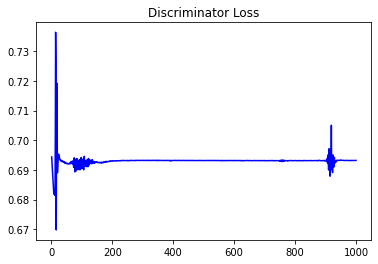

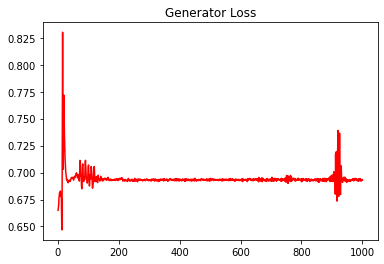

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08284338473270951


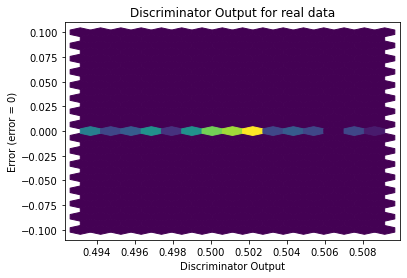

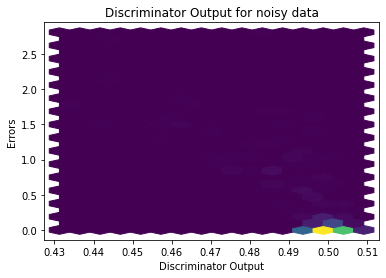

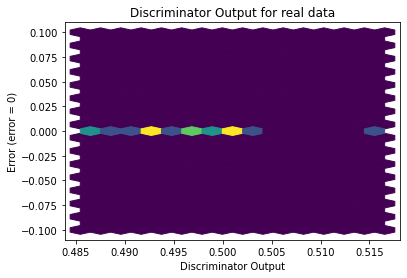

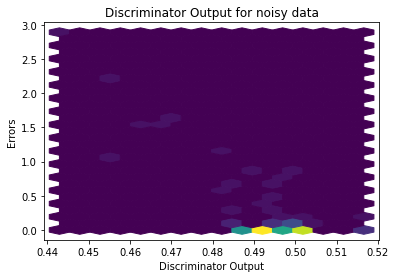

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


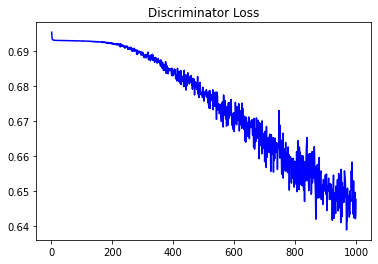

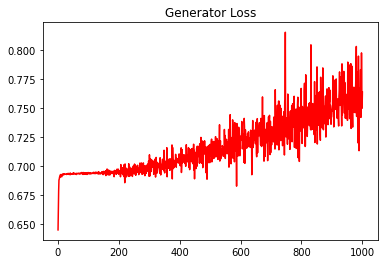

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08358914712829393


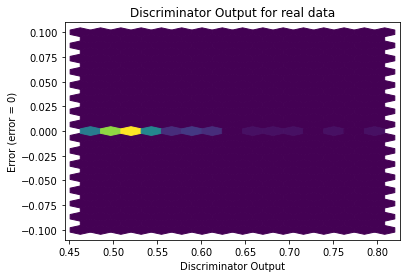

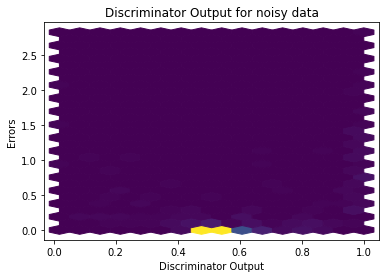

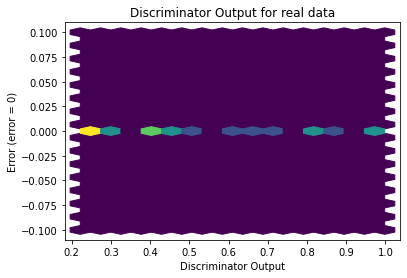

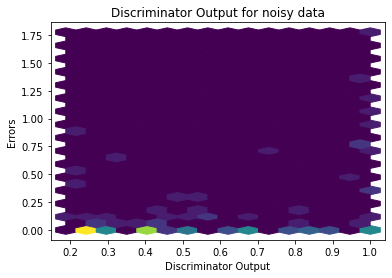

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
